# Marketing Campaigns


## 1. Business Understanding

### Problem scenario: 
Marketing mix stands as a widely utilized concept in the execution of marketing strategies. It encompasses various facets within a comprehensive marketing plan, with a central focus on the four Ps of marketing: product, price, place, and promotion.

### Problem objective:
As a data scientist, you must conduct exploratory data analysis and hypothesis testing to enhance your comprehension of the diverse factors influencing customer acquisition.

### Data description:
The variables such as birth year, education, income, and others pertain to the first 'P' or 'People' in the tabular data presented to the user. The expenditures on items like wine, fruits, and gold, are associated with ‘Product’. Information relevant to sales channels, such as websites and stores, is connected to ‘Place’, and the fields discussing promotions and the outcomes of various campaigns are linked to ‘Promotion’.

In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# For better visualizations
plt.style.use('ggplot')
sns.set(style="whitegrid")

## Dataset Overview

In [243]:
# Read data
raw_df = pd.read_csv("data/marketing_data.csv")

# Display basic information
print(f"Dataset Shape: {raw_df.shape}")
raw_df.info(memory_usage="deep")

Dataset Shape: (2240, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non

In [301]:
len(raw_df['ID'].unique())

2240

## 2.2 Data Quality Assessment
Before drawing conclusions from the data, we need to assess its quality. Poor data quality can lead to inaccurate analysis and misleading insights.

We'll assess four key dimensions of data quality:

__Completeness__: Are there missing values?
__Correctness__: Are there outliers, duplicates, or invalid values?
__Relevance__: Are the variables distributed in a way that's useful for analysis?
__Trustworthiness__: Are there inconsistencies between related variables? Are data sources reliable?

### 2.2.1 Categorical Values Assessment

In [244]:
# Display basic statistics for numerical columns
print("Summary Statistics for Categorical Variables:")
raw_df.describe(include='O').T

Summary Statistics for Categorical Variables:


,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864
Income,2216,1974,"$7,500.00",12
Dt_Customer,2240,663,8/31/12,12
Country,2240,8,SP,1095


#### ![](data/7611621.png)  &nbsp;&nbsp;   Analysis Notes: 

*Dataset has 23 numeric columns and 5 sting columns.*

*Education, Marital_Status and Country are the categorical variables.*

*Income  should be cast to float. Income has missing values*

*Dt_Customer should be cast to date.*

*Almost 40% of data has Country=SP*


In [245]:
# cast money to float
norm_df = raw_df
norm_df['Income'] = raw_df['Income'].replace('[\$,]', '', regex=True).astype(float)
# caste to datetime
norm_df['Dt_Customer'] = pd.to_datetime(raw_df['Dt_Customer'], format='%m/%d/%y')

In [246]:
print(f'Education unique values: {norm_df["Education"].drop_duplicates().to_list()}')
print(f'Marital_Status unique values: {norm_df["Marital_Status"].drop_duplicates().to_list()}')
print(f'Country unique values: {norm_df["Country"].drop_duplicates().to_list()}')

norm_df['Education'].value_counts()

Education unique values: ['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic']
Marital_Status unique values: ['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO', 'Alone', 'Absurd']
Country unique values: ['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME']


Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [247]:
# Update Education '2n Cycle' with Masters (according to the internet it seems mean the same)

def education_map(x):
    if x in ('Graduation', 'Master', '2n Cycle'):
        return 'Graduate'
    else:
        return x
        
def marital_status_map(x):
    if x in ('Married','Togather'):
        return 'Married'
    else:
        return 'Single'

norm_df['Education'] = norm_df['Education'].apply(education_map)
# Update Marital_Status with 2 categories Single and Married
norm_df['Marital_Status'] = norm_df['Marital_Status'].apply(marital_status_map)

### 2.2.2 Numerical values Assessment

In [248]:
from datetime import datetime
#Create variables to represent the total number of children, age, and total spending.
norm_df['Children'] = norm_df['Kidhome'] + norm_df['Teenhome']
#Derive the total purchases from the number of transactions across the three channels.
norm_df['NumAllChannelsPurchases'] = norm_df['NumWebPurchases'] + norm_df['NumCatalogPurchases'] + norm_df['NumStorePurchases']
# Age
current_year = datetime.now().year
norm_df['Age'] = current_year - norm_df['Year_Birth']


In [249]:
print("Statistical analysis:")
norm_df.describe().T

Statistical analysis:


,count,mean,min,25%,50%,75%,max,std
ID,2240.0,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
Year_Birth,2240.0,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
Income,2216.0,52247.251354,1730.0,35303.0,51381.5,68522.0,666666.0,25173.076661
Kidhome,2240.0,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Recency,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,2240.0,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393
MntFruits,2240.0,26.302232,0.0,1.0,8.0,33.0,199.0,39.773434
MntMeatProducts,2240.0,166.95,0.0,16.0,67.0,232.0,1725.0,225.715373


#### ![](data/7611621.png)  &nbsp;&nbsp;   Analysis Notes: 

*__Year_Birth__:  min=1893 looks like outlier std=12 and mean=1970, so we need to filter out rows customers that birth earlier than 1934, which are 91 years old. Looks reasonable but customers may be older still, so we will check later.*
*__Income__: has missing values*
*__MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds__: data is left skewed and potentially has outliers*
*__AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Response, Complain__: boolean values that may be equal to 0 or 1, tending to zeros*


In [250]:
# reduce memory usage
norm_df['AcceptedCmp3']  = norm_df['AcceptedCmp3'].astype('uint8')
norm_df['AcceptedCmp4']  = norm_df['AcceptedCmp4'].astype('uint8')
norm_df['AcceptedCmp5']  = norm_df['AcceptedCmp5'].astype('uint8')
norm_df['AcceptedCmp1']  = norm_df['AcceptedCmp1'].astype('uint8')
norm_df['AcceptedCmp2']  = norm_df['AcceptedCmp2'].astype('uint8')
norm_df['Response']  = norm_df['Response'].astype('uint8')
norm_df['Complain']  = norm_df['Complain'].astype('uint8')
norm_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       2240 non-null   int64         
 1   Year_Birth               2240 non-null   int64         
 2   Education                2240 non-null   object        
 3   Marital_Status           2240 non-null   object        
 4   Income                   2216 non-null   float64       
 5   Kidhome                  2240 non-null   int64         
 6   Teenhome                 2240 non-null   int64         
 7   Dt_Customer              2240 non-null   datetime64[ns]
 8   Recency                  2240 non-null   int64         
 9   MntWines                 2240 non-null   int64         
 10  MntFruits                2240 non-null   int64         
 11  MntMeatProducts          2240 non-null   int64         
 12  MntFishProducts          2240 non-

### 2.2.3 Missing Values Analysis

Conduct missing value imputation, considering that customers with similar education and marital status tend to have comparable yearly incomes, on average. 
It may be necessary to cleanse the data before proceeding. 
Specifically, scrutinize the categories of education and marital status for data cleaning.

In [251]:
# Check for missing values
missing_values = norm_df.isnull().sum()
missing_percentage = (missing_values / len(norm_df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage.round(2)
})

print("Missing Values Analysis:")
missing_values_filter = missing_df['Missing Values'] > 0
print(missing_df[missing_values_filter].sort_values(by='Percentage', ascending=False))

Missing Values Analysis:
        Missing Values  Percentage
Income              24        1.07


#### ![](data/7611621.png)  &nbsp;&nbsp;   Analysis Notes: 
*__Income__ has ~1% of missing values and data is skewed to right and it has 1 outlier*  

In [252]:
# Fillna with avg income val by Education and Marital_Status
calc_df = norm_df
income_imputer_df = norm_df.groupby(['Education', 'Marital_Status'])['Income'].mean()
tmp_df = pd.merge(norm_df, income_imputer_df, how='left', on=['Education', 'Marital_Status'])
tmp_df['Income'] = tmp_df['Income_x'].fillna(tmp_df['Income_y'])
calc_df = tmp_df.drop(['Income_x', 'Income_y'], axis=1)
calc_df['Income'].describe()

count      2240.000000
mean      52257.575038
std       25038.769696
min        1730.000000
25%       35538.750000
50%       51550.000000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

### 2.2.3 Outliers check

#### Year_Birth

<Axes: xlabel='Year_Birth', ylabel='Count'>

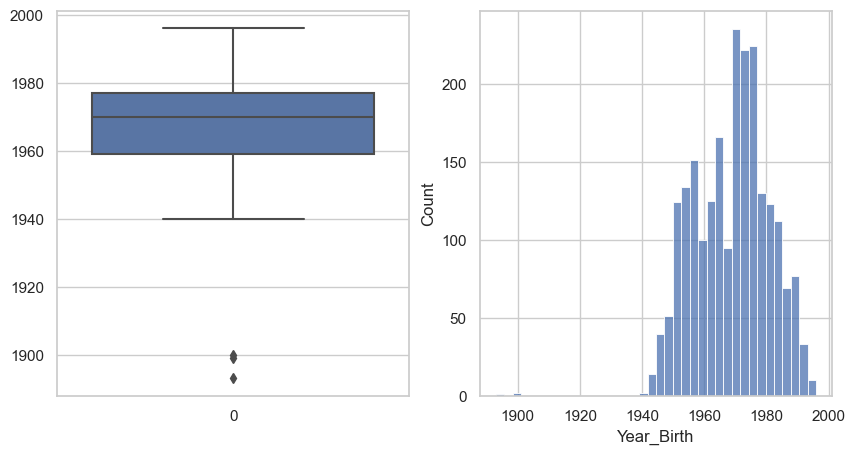

In [253]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
sns.boxplot(calc_df['Year_Birth'], ax=axes[0])
sns.histplot(calc_df['Year_Birth'], ax=axes[1])


#### ![](data/7611621.png)  &nbsp;&nbsp;   Analysis Notes: 

*__Year_Birth__: has outliers, data looks biased as we have more clients birth between 1970s and 1980s, which may reflect the country's population distribution*

In [254]:
# Filter out clients that older than 100
calc_df = calc_df[calc_df['Year_Birth'] > 1925]

In [255]:
def show_plots_board(pdf, cols, axes, annotate=True, plot='histplot'):
    axes = axes.flatten()
    for i, col in enumerate(cols):
        if i < len(axes):
            if pdf[col].notna().any():  # Only plot columns with non-null values
                match(plot):
                    case 'boxplot':
                        sns.boxplot(calc_df[col], ax=axes[i])
                    case _:
                        sns.histplot(pdf[col].dropna(), kde=True, ax=axes[i])
                
                axes[i].set_title(f'Distribution of {col}')
                
                if annotate:
                    # Add skewness and kurtosis
                    skewness = pdf[col].skew()
                    kurtosis = pdf[col].kurt()
                    axes[i].annotate(f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}',
                                     xy=(0.7, 0.85), xycoords='axes fraction')

    plt.tight_layout()
    plt.show()

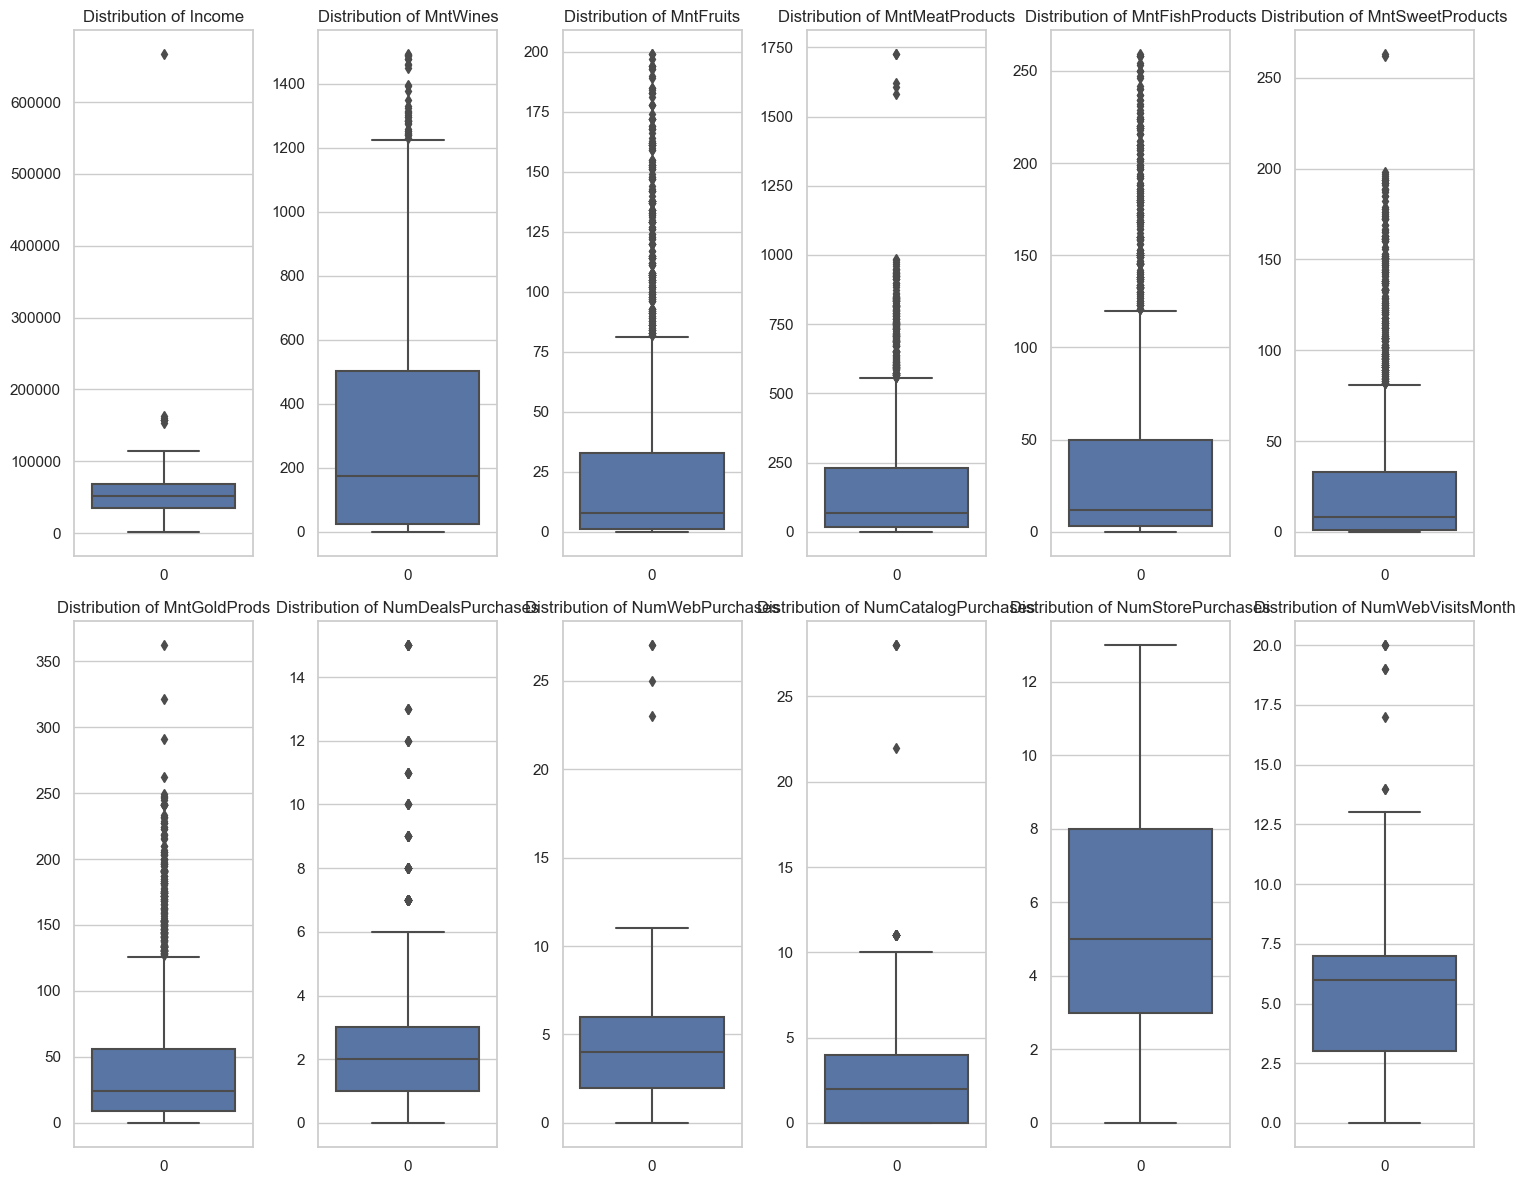

In [256]:
# Visualize distributions of key numerical variables
fig, axes = plt.subplots(2, 6, figsize=(15, 12))
cols = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
        'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
        'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
show_plots_board(calc_df, cols, axes, False, 'boxplot')

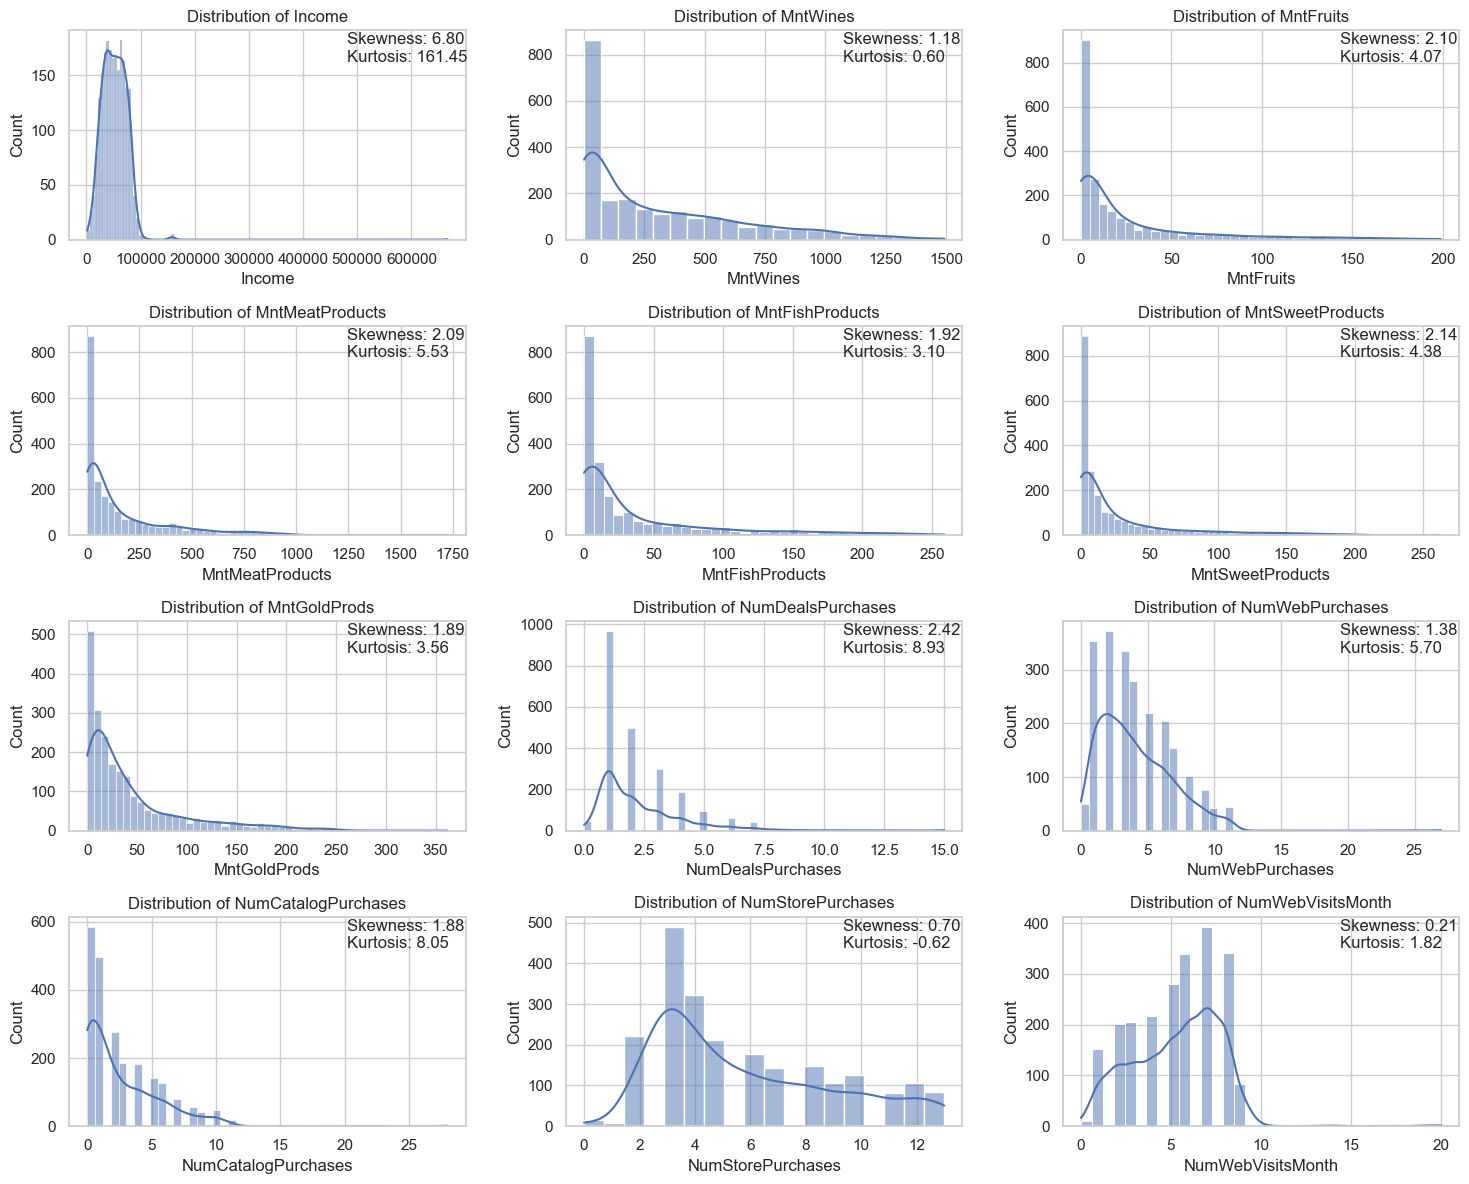

In [257]:
# Visualize distributions of key numerical variables
fig, axes = plt.subplots(4, 3, figsize=(15, 12))

cols = ['Income', 'MntWines', 'MntFruits',
        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
        'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
        'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
show_plots_board(calc_df, cols, axes)

#### ![](data/7611621.png)  &nbsp;&nbsp;   Analysis Notes: 

*__Recency__: looks like uniform distribution*
*__Income__:  has outlier above 600 000*
*Mnt columns data is left skewed and more looks like Poisson (exponential) distribution but Purchases columns data has tendency to Log-Normal distribution*

In [258]:
# replaced outlier with tail value
from feature_engine.outliers import Winsorizer
print('Before: \n' + str(calc_df[['Income', 'MntWines', 'MntFruits',
                                  'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                                  'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                                  'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].describe().T))
capper = Winsorizer(capping_method='gaussian',
                    tail='right',
                    fold=5,
                    variables=['Income', 'MntWines', 'MntFruits',
                               'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                               'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                               'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'])

df= capper.fit_transform(calc_df)
print('\n')
print('After: \n' + str(df[['Income', 'MntWines', 'MntFruits',
                            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                            'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].describe().T))

Before: 
                      count          mean           std     min      25%  \
Income               2237.0  52247.033565  25044.089829  1730.0  35523.0   
MntWines             2237.0    303.995530    336.574382     0.0     24.0   
MntFruits            2237.0     26.270451     39.715972     0.0      1.0   
MntMeatProducts      2237.0    166.916853    225.661158     0.0     16.0   
MntFishProducts      2237.0     37.523022     54.639909     0.0      3.0   
MntSweetProducts     2237.0     27.068842     41.293949     0.0      1.0   
MntGoldProds         2237.0     43.968708     52.054318     0.0      9.0   
NumDealsPurchases    2237.0      2.326777      1.932923     0.0      1.0   
NumWebPurchases      2237.0      4.087170      2.779461     0.0      2.0   
NumCatalogPurchases  2237.0      2.662494      2.923456     0.0      0.0   
NumStorePurchases    2237.0      5.794367      3.250940     0.0      3.0   
NumWebVisitsMonth    2237.0      5.319177      2.426386     0.0      3.0   

  

### After fixing outliers

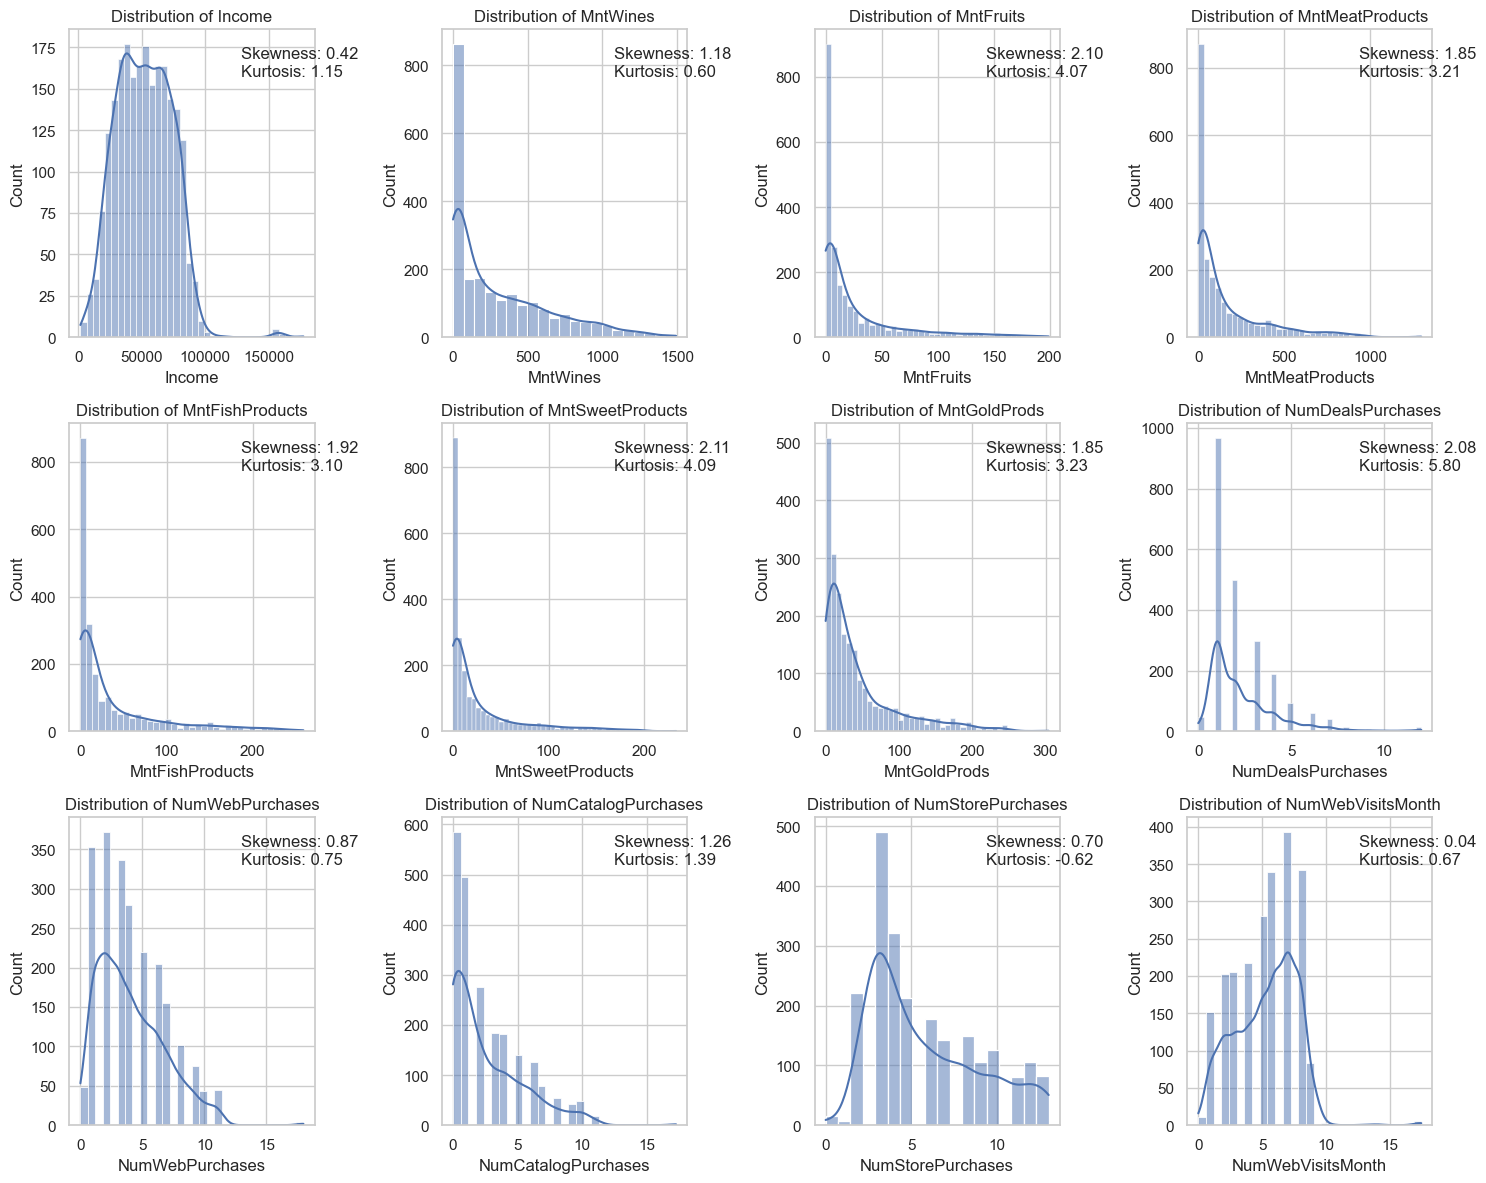

In [259]:
# Visualize distributions of key numerical variables
fig, axes = plt.subplots(3, 4, figsize=(15, 12))

cols = ['Income', 'MntWines', 'MntFruits', 
        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
        'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 
        'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
show_plots_board(df, cols, axes)

#### ![](data/7611621.png)  &nbsp;&nbsp;   Analysis Notes: 

*Visually distributions haven't changed  significatly*

### Add total expenditure

In [260]:
df['TotalExpenditure'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

### Encode Education and marital status

In [261]:
from feature_engine.encoding import OrdinalEncoder
od_encoder = OrdinalEncoder(encoding_method='arbitrary')
edf = od_encoder.fit_transform(df)

## 3. Generate a heatmap to illustrate the correlation between different pairs of variables.

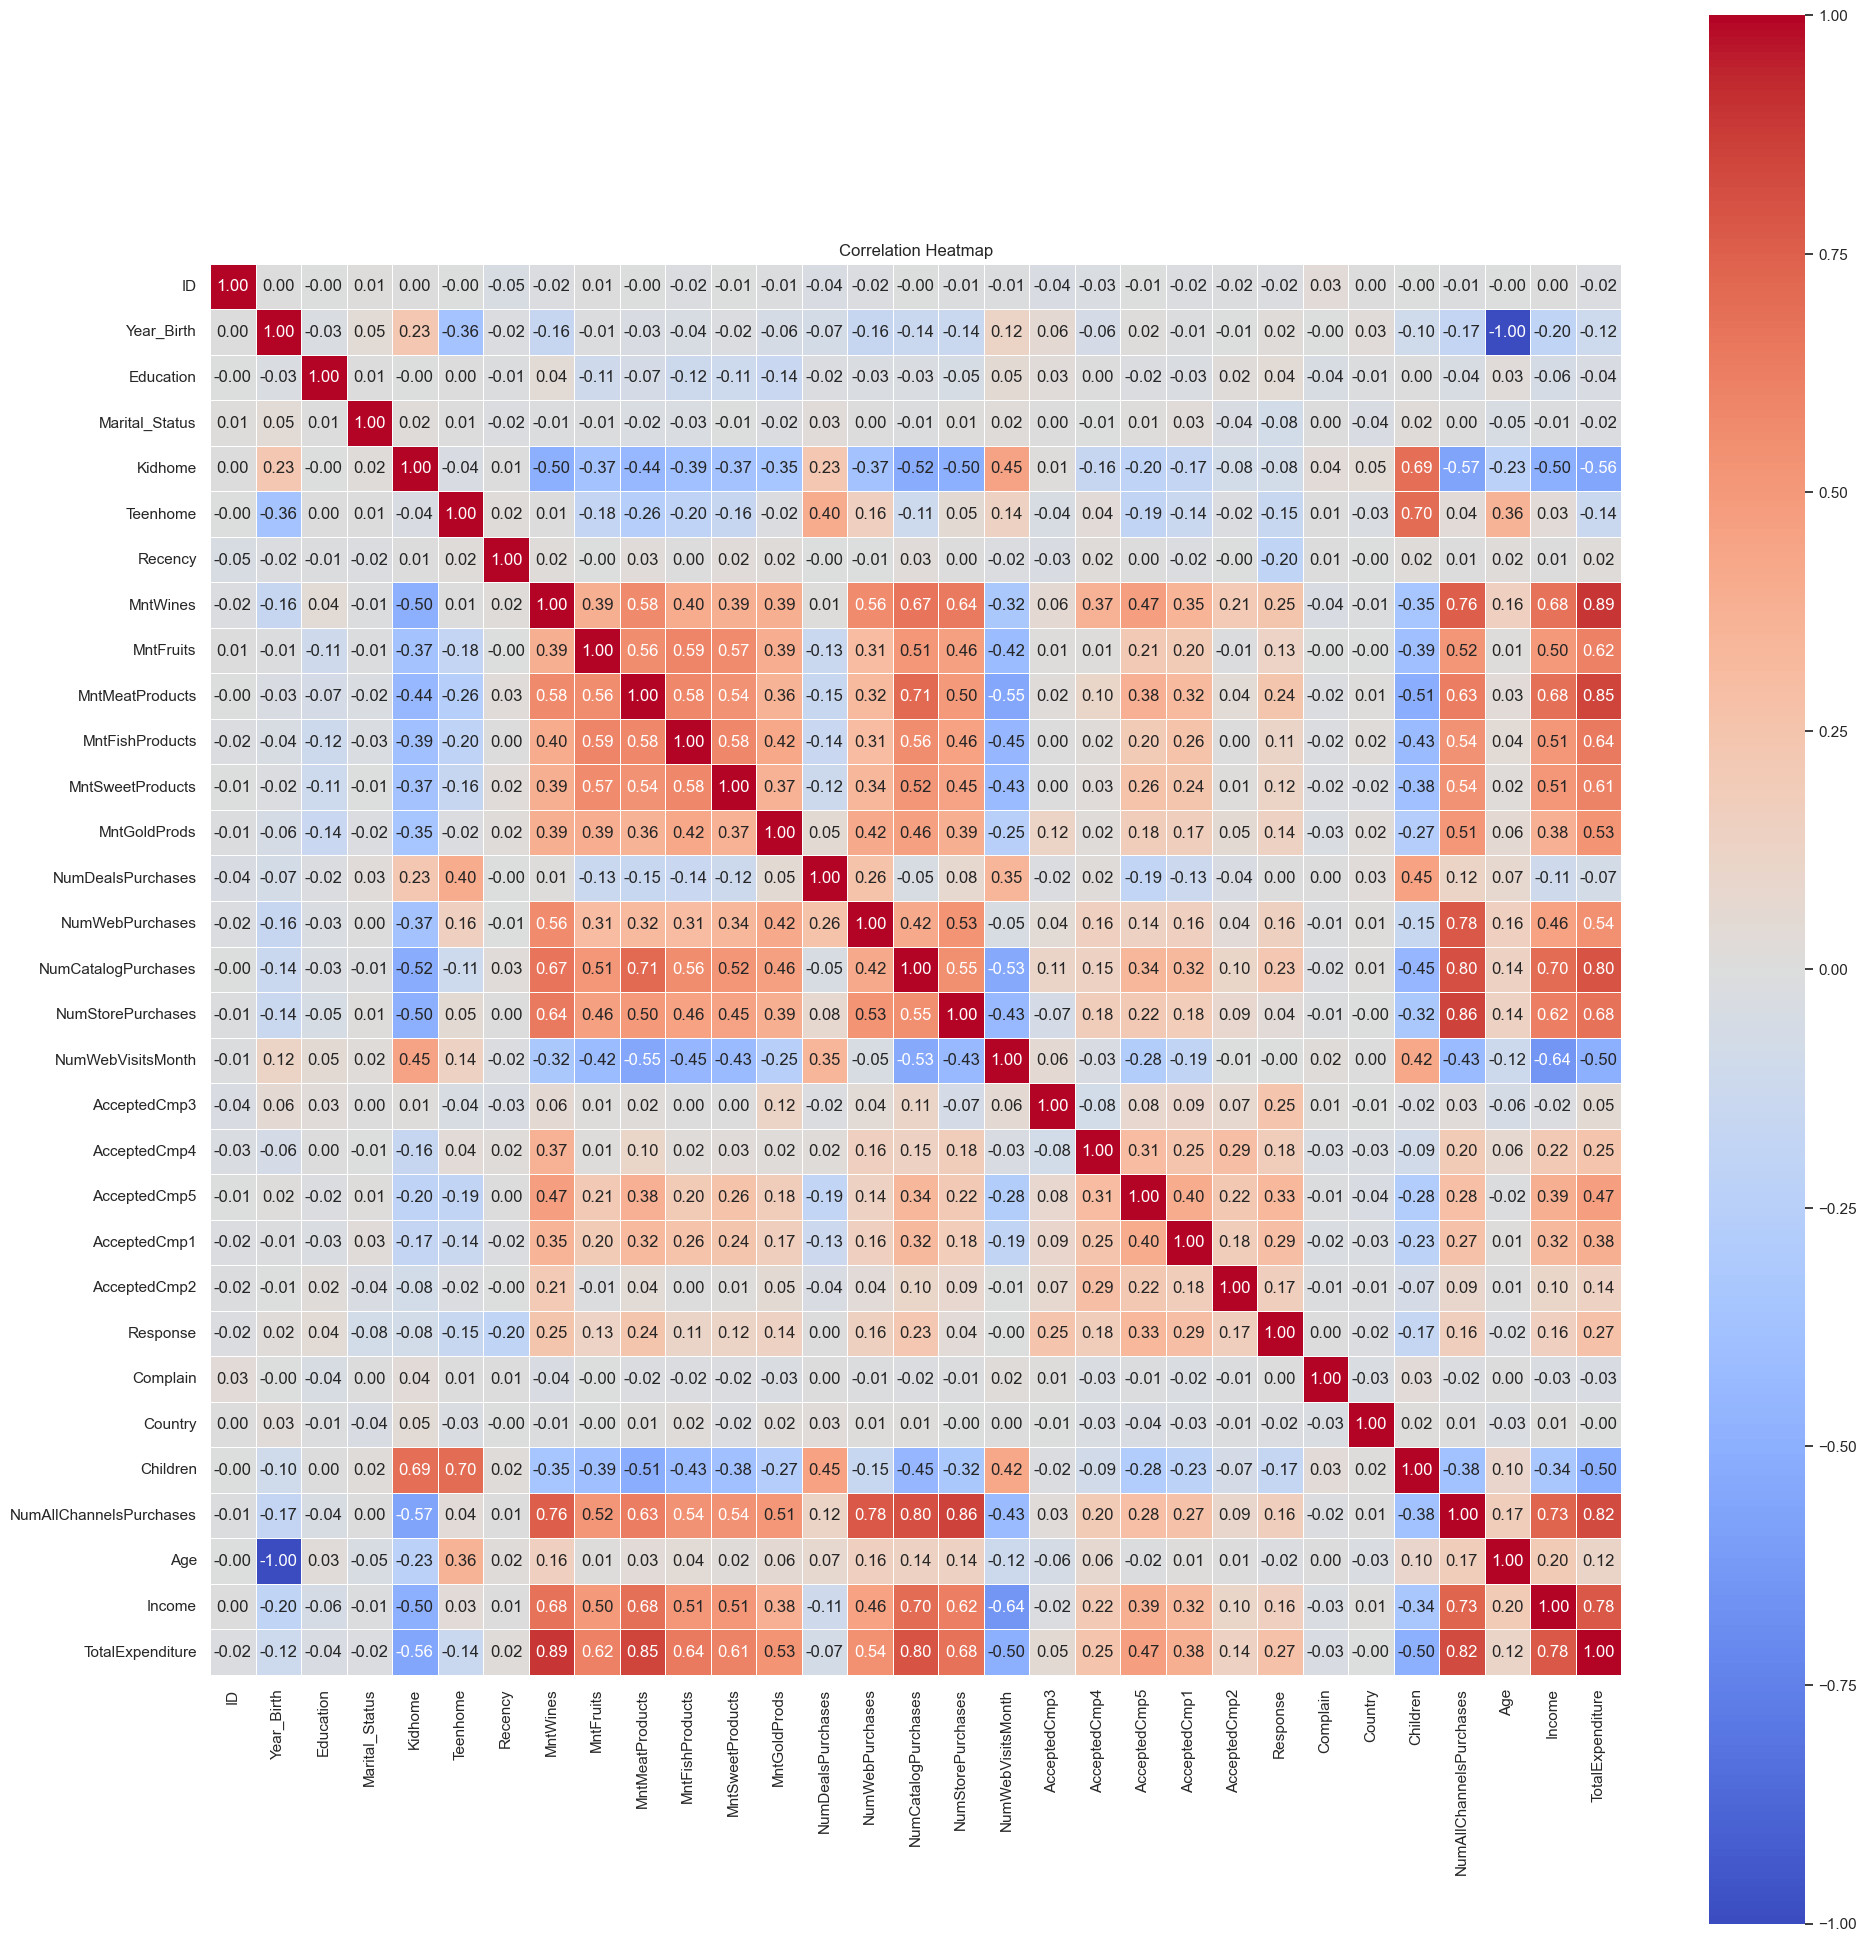

In [262]:
corr = edf.corr(numeric_only=True)

# Generate heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# 4 Test hypotheses

### Hypotheses testing:
2. Create a null hypothesis and an alternative hypothesis.
2. Decide on a level of significance, that is, alpha = 5% or 1%.
3. Choose the type of test you want to perform per the sample data (z-test, t-test, or chi-square).
4. Calculate the test statistics (z-score, t-score) using the respective formula of the test chosen.
5. Obtain the critical value in the sampling distribution to construct the rejection region of size alpha using the z-table,
   t-table, or chi table.
6. Compare the test statistics with the critical value and locate the position of the calculated test statistics, that is, see if it is in the rejection region or non-rejection region.
7. *a.* If the critical value lies in the rejection region, you will reject the hypothesis, that is, sample data provides sufficient evidence against the null hypothesis, and there is a significant difference between hypothesized value and the observed value of the parameter.

    *b.* If the critical value lies in the non-rejection region, you will not reject the hypothesis, that is, the sample data does not provide sufficient evidence against the null hypothesis, and the difference between hypothesized value and the observed value of the parameter is due to the fluctuation of the sample.
   

### Choosing between T-Test and Z-Test:

__1. Sample Size__

Z-test: It is used when the sample size is large (usually, n ≥ 30). The larger the sample size, the more the sample mean's distribution will resemble a normal distribution due to the central limit theorem.

T-test: It is preferred for smaller sample sizes (n < 30). The T-test is more adaptable to small sample sizes since it accounts for the extra uncertainty introduced by estimating the population standard deviation.

__2. Population Standard Deviation__

Z-test: It is required that the population standard deviation is known. This circumstance is less common in real-world scenarios because having access to the entire population data typically implies having the population standard deviation.

T-test: It is used when the population standard deviation is unknown and is estimated using the sample standard deviation. The T-test adjusts for the fact that the sample standard deviation varies between samples.

__3. Distribution of the Data__

Z-test: It assumes that the data follows a normal distribution. This assumption becomes less of a concern with large sample sizes due to the central limit theorem.

T-test: It is more suitable to use non-parametric tests when you are unsure if the data is normally distributed, particularly with smaller sample sizes.

In [263]:
hdf = df
hdf['PrcntStore'] = hdf['NumStorePurchases'] * 100.0/(hdf['NumWebPurchases'] + hdf['NumStorePurchases'] + hdf['NumCatalogPurchases'])
hdf['PrcntWeb'] = hdf['NumWebPurchases'] * 100.0/(hdf['NumWebPurchases'] + hdf['NumStorePurchases'] + hdf['NumCatalogPurchases'])

## 4.1 Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences.

#### ![](data/7611621.png)  &nbsp;&nbsp;   Analysis Notes: 

*Older group sounds too undefined so lets assume that older group is age >= 60*

In [264]:
AGE_SPLITTER = 60
def get_age_group(x):
    x1 = x if x >= 35 else 35
    x1 = x1 if x1 <= 80 else 80
    x1 = round(x1/5, 0)*5
    return x1

df1 = hdf
df1['AgeGroup'] = df1['Age'].apply(get_age_group)
df1['AgeGroup'] = df1['AgeGroup'].astype('int8')
df2 = df1.groupby(['AgeGroup'])[['PrcntStore']].mean()
df3 = df1.groupby(['AgeGroup'])[['Age']].count()
df4 = pd.merge(df2, df3, how='left', on=['AgeGroup']).reset_index()
df4['IsOlderGroup'] = df4['AgeGroup'].apply(lambda x: 1 if x >= AGE_SPLITTER else 0)
df4

,AgeGroup,PrcntStore,Age,IsOlderGroup
0,35,51.868749,120,0
1,40,54.871587,181,0
2,45,51.824554,253,0
3,50,51.301530,367,0
4,55,50.055297,365,0
5,60,49.619571,255,1
6,65,49.653377,233,1
7,70,48.630504,232,1
8,75,48.950426,175,1
9,80,46.787945,56,1


In [265]:
df4.groupby(['IsOlderGroup'])[['Age']].sum()

,Age
IsOlderGroup,
0,1286
1,951


#### ![](data/7611621.png)  &nbsp;&nbsp;   Analysis Notes: 

*Sample is slightly imbalanced. I'll take 200 random customers from each group* 

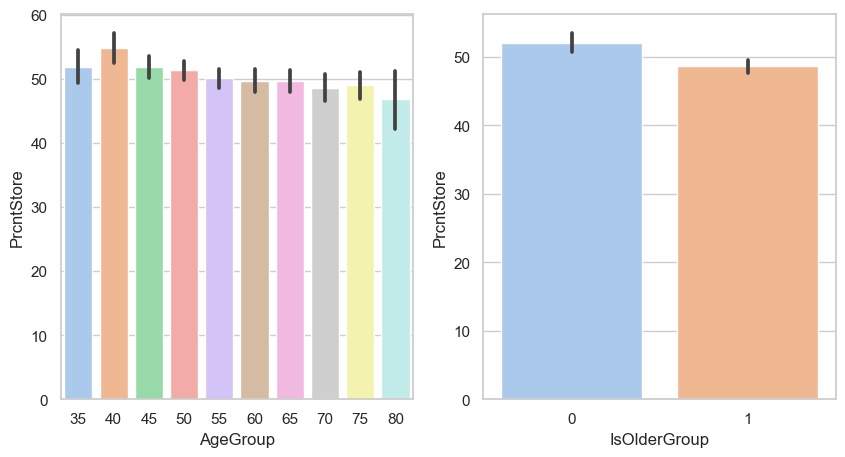

In [266]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
sns.set_style("whitegrid")
sns.barplot(x='AgeGroup', y='PrcntStore', data=df1, palette='pastel', ax=axes[0])
sns.barplot(x='IsOlderGroup', y='PrcntStore', data=df4, palette='pastel', ax=axes[1])
plt.title('')
plt.show()

*I'll make 2 random samples of 200 customers and perform Z-test* 

In [267]:
yang = df1[df1['AgeGroup'] < AGE_SPLITTER].sample(n=200, random_state=42)
old = df1[df1['AgeGroup'] >= AGE_SPLITTER].sample(n=200, random_state=42)

<Axes: title={'center': 'The Older Group'}, xlabel='AgeGroup', ylabel='PrcntStore'>

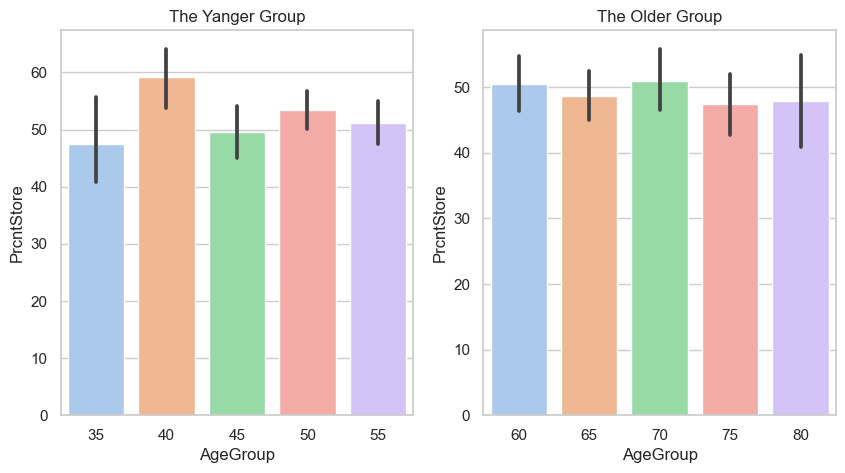

In [268]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
sns.set_style("whitegrid")
axes[0].set_title('The Yanger Group')
sns.barplot(x='AgeGroup', y='PrcntStore', data=yang, palette='pastel', ax=axes[0])
axes[1].set_title('The Older Group')
sns.barplot(x='AgeGroup', y='PrcntStore', data=old, palette='pastel', ax=axes[1])


__Null Hypothesis (H₀)__ : *There IS no difference between the groups and both groups has the same score of store purchases* 
__Alternative Hypothesis (H₁)__ : *There IS a difference between the groups*

In [269]:
def interpretation(p_val):
    print(f"P-value: {p_val}")
    alpha = 0.05
    if p_val < alpha:
        print("Reject the null hypothesis - there is a significant difference in data groups")
    else:
        print("Fail to reject the null hypothesis - no significant difference in data groups")

In [270]:
from scipy import stats

t_stat, p_val = stats.ttest_ind(yang['PrcntStore'], old['PrcntStore'])
interpretation(p_val)

P-value: 0.06349860388641612
Fail to reject the null hypothesis - no significant difference in data groups


In [271]:
from scipy.stats import chi2_contingency

data = [yang['PrcntStore'].to_list(), old['PrcntStore'].to_list()]
stat, p_val, dof, chi_array = chi2_contingency(data)
interpretation(p_val)

P-value: 1.429079564435356e-82
Reject the null hypothesis - there is a significant difference in data groups


## 4.2 Customers with children likely experience time constraints, making online shopping a more convenient option.

<Axes: xlabel='Children', ylabel='Count'>

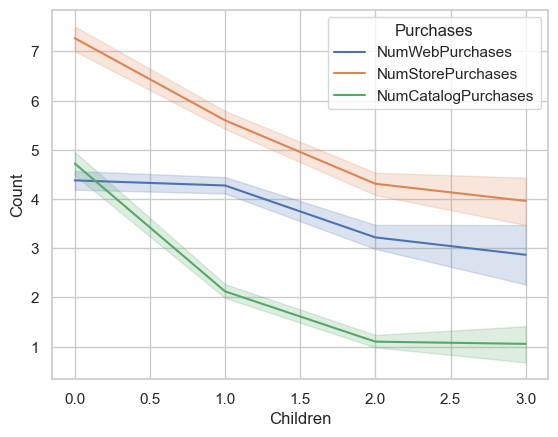

In [272]:
df1 = hdf[['Children', 'NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']].melt(id_vars="Children", var_name="Purchases", value_name="Count")

sns.lineplot(data=df1, x='Children', y='Count', hue='Purchases')


#### ![](data/7611621.png)  &nbsp;&nbsp;   Analysis Notes: 

*According to graph I see that count of purchases goes down for all categories, but web purchases relatively doesn't go down as fast as others*

<Axes: xlabel='Children', ylabel='PrcntWeb'>

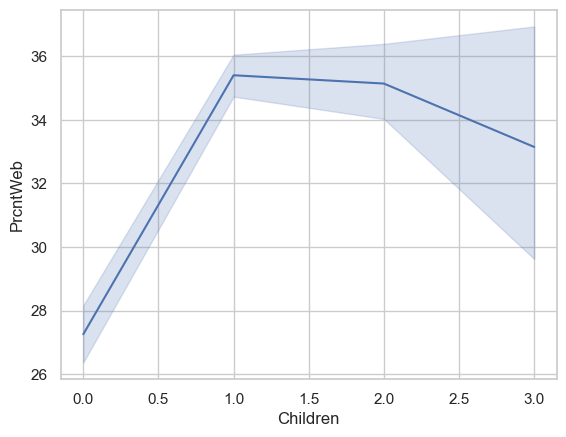

In [273]:
sns.lineplot(data=hdf, x='Children', y='PrcntWeb')

In [274]:
hdf.groupby(['Children'])[['ID']].count()

,ID
Children,
0,637
1,1126
2,421
3,53


__Null Hypothesis (H₀)__ : *There IS no difference between the groups and both groups has the same score of web purchases* 
__Alternative Hypothesis (H₁)__ : *There IS a difference between the groups*

In [275]:
no_children = hdf[hdf['Children'] == 0].sample(n=100)
has_children = hdf[hdf['Children'] > 0].sample(n=100)

In [276]:
from scipy import stats

t_stat, p_val = stats.ttest_ind(no_children['PrcntWeb'], has_children['PrcntWeb'])
interpretation(p_val)

P-value: 2.691636382876618e-07
Reject the null hypothesis - there is a significant difference in data groups


## 4.3 Sales at physical stores may face the risk of cannibalization by alternative distribution channels.

In [ ]:
sns.lineplot(data=hdf, x='NumWebPurchases', y='PrcntWeb')

__Null Hypothesis (H₀)__ : *There IS NO correlation between NumWebPurchases and NumStorePurchases or NumCatalogPurchases* 
__Alternative Hypothesis (H₁)__ : *There IS a correlation between the countries*

In [295]:
from scipy.stats import pearsonr, spearmanr

corr, p_value = pearsonr(hdf['NumStorePurchases'], hdf['NumWebPurchases'])
print(f"Pearson correlation: {corr}, p-value: {p_value}, null hypothesis: {p_value > 0.05}")

corr, p_value = spearmanr(hdf['NumStorePurchases'], hdf['NumWebPurchases'])
print(f"Spearman correlation: {corr}, p-value: {p_value}, null hypothesis: {p_value > 0.05}")

corr, p_value = pearsonr(hdf['NumStorePurchases'], hdf['NumCatalogPurchases'])
print(f"Pearson correlation: {corr}, p-value: {p_value}, null hypothesis: {p_value > 0.05}")

corr, p_value = spearmanr(hdf['NumStorePurchases'], hdf['NumCatalogPurchases'])
print(f"Spearman correlation: {corr}, p-value: {p_value}, null hypothesis: {p_value > 0.05}")

Pearson correlation: 0.5272971332235933, p-value: 2.463772958228688e-160, null hypothesis: False
Spearman correlation: 0.6721002125469242, p-value: 5.444079715580007e-294, null hypothesis: False
Pearson correlation: 0.5496464182182859, p-value: 8.276427175935201e-177, null hypothesis: False
Spearman correlation: 0.7089542067187681, p-value: 0.0, null hypothesis: False


#### ![](data/7611621.png)  &nbsp;&nbsp;   Analysis Notes: 

*According to spearman and person test there is a strong correlation between the store and web purchases*

<Axes: xlabel='NumWebPurchases', ylabel='NumCatalogPurchases'>

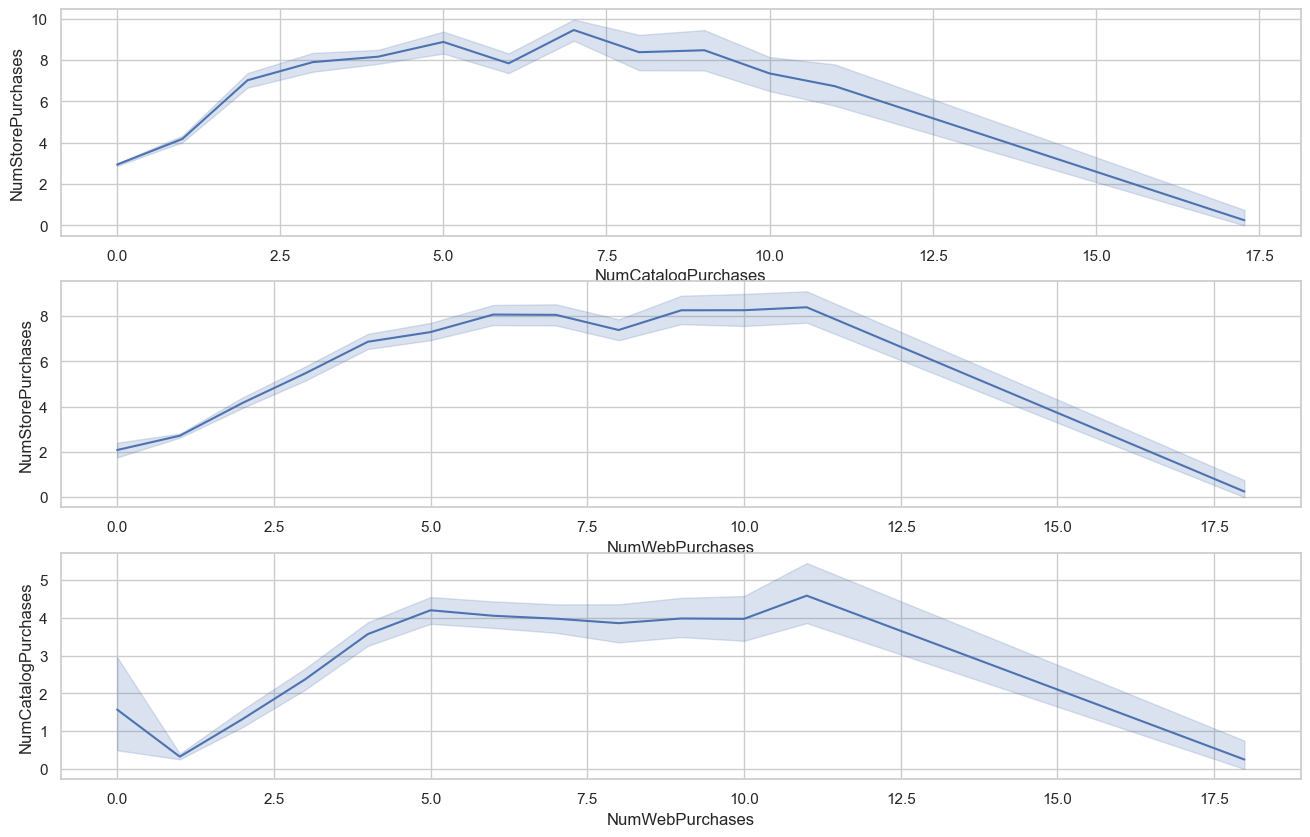

In [310]:
fig, axes = plt.subplots(nrows=3, figsize=(16,10))
sns.set_style("whitegrid")
sns.lineplot(x='NumCatalogPurchases', y='NumStorePurchases', data=df, palette='pastel', ax=axes[0])
sns.lineplot(x='NumWebPurchases', y='NumStorePurchases', data=df, palette='pastel', ax=axes[1])
sns.lineplot(x='NumWebPurchases', y='NumCatalogPurchases', data=df, palette='pastel', ax=axes[2])


## 4.4 Does the United States significantly outperform the rest of the world in total purchase volumes?

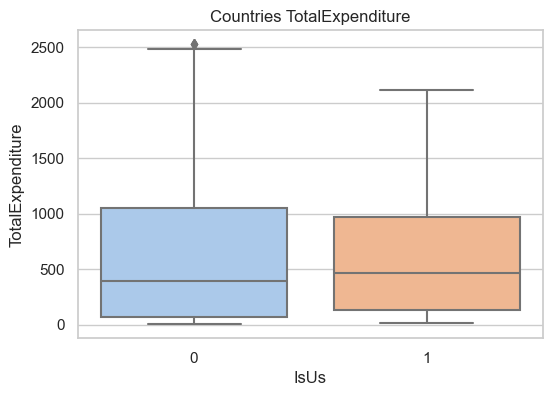

In [283]:
hdf['IsUs'] = df['Country'].apply(lambda x: 1 if x == 'US' else 0)
plt.figure(figsize=(6, 4))
plt.tight_layout()
sns.set_style("whitegrid")
sns.boxplot(x='IsUs', y='TotalExpenditure', data=df, palette='pastel')
plt.title('Countries TotalExpenditure')
plt.show()

In [284]:
hdf.groupby(hdf['IsUs'])[['ID']].count()

,ID
IsUs,
0,2128
1,109


__Null Hypothesis (H₀)__ : *There IS no difference between the USA and other countries in TotalExpenditure* 
__Alternative Hypothesis (H₁)__ : *There IS a difference between the countries*

In [285]:
sample1 = hdf[hdf['IsUs'] == 0].sample(n=100)
sample2 = hdf[hdf['IsUs'] == 1].sample(n=100)
from scipy import stats

t_stat, p_val = stats.ttest_ind(sample1['TotalExpenditure'], sample2['TotalExpenditure'])
interpretation(p_val)

P-value: 0.19944271683115708
Fail to reject the null hypothesis - no significant difference in data groups


# 5 Vizualization
## 5.1 Identify the top-performing products and those with the lowest revenue.

In [ ]:
import re
total_revenue = df[['MntWines', 'MntFruits',
    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
    'MntGoldProds']].sum().reset_index()
total_revenue.columns = ['Category','Revenue']

total_revenue['Category'] = total_revenue['Category'].apply(lambda x: re.findall(r'[A-Z][a-z]*|[a-z]+', x.replace('Mnt', ''))[0] )
total_revenue = total_revenue.sort_values(by='Revenue', ascending=False)

sns.set_style("whitegrid")
sns.barplot(x='Category', y='Revenue', data=total_revenue, palette='pastel')
plt.title('Identify the top-performing products and those with the lowest revenue')
plt.tight_layout()
plt.show()

## 5.2 Examine if there is a correlation between customers' age and the acceptance rate of the last campaign.

In [ ]:
acceptance_rate_by_age = df.groupby(df['Age'])['AcceptedCmp5'].sum().reset_index()
acceptance_rate_by_age.columns = ['Age', 'LastCampaignAcceptedCount']

sns.set_style("whitegrid")
sns.lineplot(data=acceptance_rate_by_age, x='Age', y='LastCampaignAcceptedCount', palette='pastel')
plt.title("Examine if there is a correlation between customers's age and the acceptance rate of the last campaign")
plt.show()

## 5.3 Determine the country with the highest number of customers who accepted the last campaign.

In [ ]:
last_cmp_accept_by_country = df.groupby(df['Country'])['AcceptedCmp5'].sum().reset_index()
last_cmp_accept_by_country_count = df.groupby(df['Country'])['AcceptedCmp5'].count().reset_index()
last_cmp_accept_by_country.columns = ['Country', 'LastCampaignAcceptedCount']
last_cmp_accept_by_country_count.columns = ['Country', 'Count']
last_cmp_accept_by_country = pd.merge(last_cmp_accept_by_country, last_cmp_accept_by_country_count)
last_cmp_accept_by_country = last_cmp_accept_by_country.melt(id_vars="Country", var_name="Group", value_name="Value")

sns.set_style("whitegrid")
sns.lineplot(data=last_cmp_accept_by_country, x = 'Country', y= 'Value', hue='Group', palette='pastel')
plt.title('Determine the country with the highest number of customers who accepted the last campaign')
plt.show()

## 5.4 Investigate if there is a discernible pattern in the number of children at home and the total expenditure.

In [ ]:
sns.set_style("whitegrid")
sns.lineplot(data=df, x='Children', y='TotalExpenditure', palette='pastel')
plt.title('Investigate if there is a discernible pattern in the number of children at home and the total expenditure')
plt.show()

#### ![](data/7611621.png)  &nbsp;&nbsp;   Analysis Notes: 

*__Recency__: looks like uniform distribution*
*I see exponential dependency between number of children and total expenditure*

## 5.5 Analyze the educational background of customers who lodged complaints in the last two years.

In [ ]:
complains_by_education = df.groupby(df['Education'])['Complain'].sum().reset_index()
complains_by_education_count = df.groupby(df['Education'])['Complain'].count().reset_index()
complains_by_education.columns = ['Education', 'ComplainCount']
complains_by_education_count.columns = ['Education', 'Count']
complains_by_education = pd.merge(complains_by_education, complains_by_education_count)
complains_by_education['RelativeComplains'] = complains_by_education['ComplainCount'] * 100/complains_by_education['Count']

sns.set_style("whitegrid")
sns.barplot(data=complains_by_education, x='Education', y='RelativeComplains', palette='pastel')
plt.title('Analyze the educational background of customers who lodged complaints in the last two years')
plt.show()